In [3]:
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import models, datasets, layers
import os
import pathlib
import matplotlib.pyplot as plt
import cv2
import tensorflow_hub as hub

In [7]:
pretrained = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_075_224/classification/5",input_shape=(224,224,3))
])

In [11]:
img = PIL.Image.open('goldfish.jpg').resize((224,224))

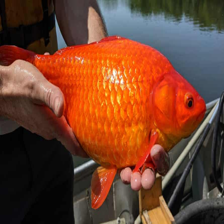

In [12]:
img

In [13]:
img = np.array(img)/255
img.shape

(224, 224, 3)

In [14]:
img[np.newaxis,...].shape

(1, 224, 224, 3)

In [16]:
np.argmax(pretrained.predict(img[np.newaxis,...]))

2

In [22]:
image_labels =[]
with open('image_labels.txt','rb') as labels:
    image_labels = labels.read().splitlines()
labels.close()

In [23]:
image_labels[:5]

[b'background', b'tench', b'goldfish', b'great white shark', b'tiger shark']

In [24]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 8s 0us/step


In [25]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [26]:
flowers_dataset_dict ={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [27]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

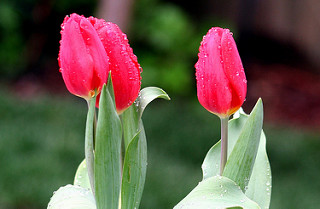

In [32]:
PIL.Image.open(flowers_dataset_dict['tulips'][0])

In [33]:
img = cv2.imread(str(flowers_dataset_dict['tulips'][0]))

In [44]:
x,y=[],[]
for flower_name, images in flowers_dataset_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resizeimg = cv2.resize(img,(224,224))
        x.append(resizeimg)
        y.append(flowers_labels_dict[flower_name])

In [45]:
x= np.array(x)
y =np.array(y)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=101)

In [47]:
x_train.shape

(2752, 224, 224, 3)

In [48]:
x_test.shape

(918, 224, 224, 3)

In [49]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

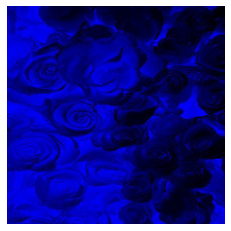

In [71]:
plt.axis('off')
plt.imshow(x_train_scaled[2])

In [59]:
y_train[3]

2

In [63]:
pred = pretrained.predict(np.array([x_train_scaled[0],x_train_scaled[1],x_train_scaled[2]]))

In [66]:
l = [np.argmax(p) for p in pred]
l

[884, 945, 108]

In [70]:
image_labels[108]

b'jellyfish'

In [73]:
feature_extracter_model = models.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4',input_shape=(224,224,3), trainable= False)
])

In [75]:
cnn = models.Sequential([
    feature_extracter_model,
    layers.Dense(5,activation='softmax')
])

cnn.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

cnn.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 64s 720ms/step - loss: 0.7128 - accuracy: 0.7431
Epoch 2/5
86/86 [==============================] - 60s 696ms/step - loss: 0.3855 - accuracy: 0.8685
Epoch 3/5
86/86 [==============================] - 61s 710ms/step - loss: 0.3050 - accuracy: 0.8997
Epoch 4/5
86/86 [==============================] - 59s 680ms/step - loss: 0.2508 - accuracy: 0.9255
Epoch 5/5
86/86 [==============================] - 57s 664ms/step - loss: 0.2166 - accuracy: 0.9375
